## Class 1

Model of the galaxy spectrum as a superposition of perfect black body spectra.

Units:
- $M$ in solar masses
- $t$ in Gyrs
- $\lambda$ in Angstrom

In [11]:
import numpy as np
import random
import matplotlib.pyplot as plt
from astropy.modeling import models
from astropy import units as u

In [12]:
Mmin = 0.1
Mmax = 100
M=np.linspace(Mmin, Mmax, 10000)
norm=1

In [13]:
def SPmodel(arrayM, wavelenght, age_gal, BBtot):
    flux_tot = BBtot(wavelenght)
    for mass in arrayM:
        age_mass = mass**(-2.5)*10                    # 10Gyrs is the lifetime of Sun
        T = mass**(3/8)*(5700)
        N=norm*mass**(-2.35)
        L=mass**(3.5)
        
        if age_gal < age_mass:
            
            BB = models.BlackBody(temperature=T*u.K, scale = 1*u.erg / (u.cm**2 *u.AA *u.s *u.sr))
            flux = N*L*BB(wavelenght)*(1/BB.bolometric_flux.value)
            flux_tot = flux_tot + flux
            
    return flux


#wl = np.linspace(1000, 11000, 1000)
wl = np.linspace(2000, 7500, 1000)

BBtotal = models.BlackBody(temperature=1000*u.K, scale = 0*u.erg / (u.cm**2 *u.AA *u.s *u.sr))
#this is the model inizialized at zero


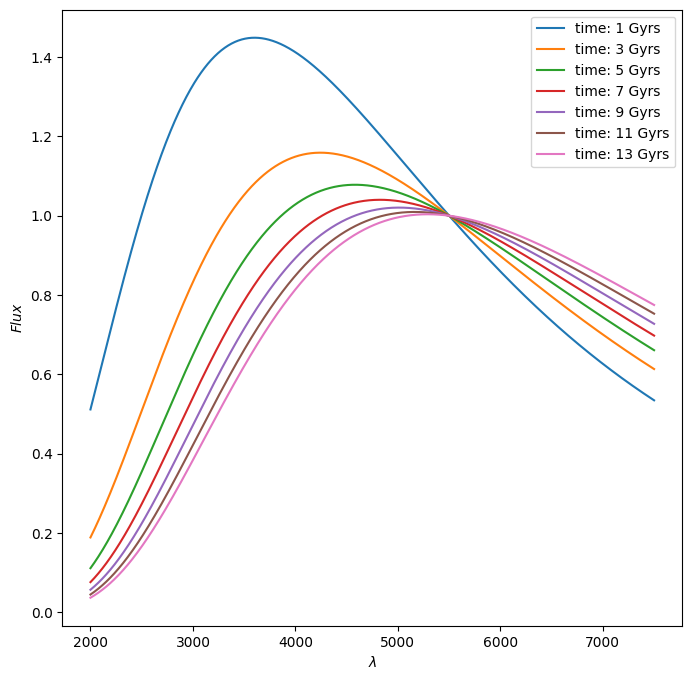

Galaxy G1 has peak at:  4000
Galaxy G2 has peak at:  4650
The peak for a galaxy of age 2.0 is at : 3998.4984984984985
The peak for a galaxy of age 5.5 is at : 4648.148148148148


In [14]:
plt.figure(figsize=(8,8))
for t in range(1, 15, 2):
    
    #normalized at a fixed wavelenght
    flux = SPmodel(M, wl, t, BBtotal) / SPmodel(M, 5500, t, BBtotal)  
    
    #normalized at the integral at time zero
    #flux = SPmodel(M, wl, t, BBtotal) / np.sum(SPmodel(M, wl, 0, BBtotal))
    
    #normalized at the peak
    #flux = SPmodel(M, wl, t, BBtotal) / np.max(SPmodel(M, wl, t, BBtotal))
    
    
    #plt.yscale('log') #use this for the normalization at integral
    #plt.ylim(1e-7, 1e-4) # use this for the normalization at integral
    
    plt.plot(wl, flux, label='time: %i Gyrs' %t)
plt.xlabel('$\lambda$')
plt.ylabel('$Flux$')

plt.legend()
plt.show()

peaks = [4000, 4650]

print('Galaxy G1 has peak at: ', peaks[0])
print('Galaxy G2 has peak at: ', peaks[1])

ages = [2, 5.5]
fluxG1 = SPmodel(M, wl, ages[0], BBtotal) / SPmodel(M, 5500, t, BBtotal)
print('The peak for a galaxy of age %.1f is at :' %ages[0], wl[np.argmax(fluxG1)])

fluxG2 = SPmodel(M, wl, ages[1], BBtotal) / SPmodel(M, 5500, t, BBtotal)
print('The peak for a galaxy of age %.1f is at :' %ages[1], wl[np.argmax(fluxG2)])


From the graph we see that as time passes the peak shifts to higher wavelenghts, its value decreases and also the luminosity at every wavelenght is lower. The reason is that as time evolves the most massive stars (which are the one that contribute the most to the luminosity) die and so the total spectrum is produced by less massive stars, whose peak is at higher wavelenghts and luminosity is lower.
Moreover, since we have assumed that there is no star formation after t=0, the total number of stars decrease with time, which means that the total luminosity emitted decrease as well.